<a href="https://colab.research.google.com/github/rohan-ml/air-travel-analysis/blob/master/Time_Series_Forecasting_Using_Deep_Learning_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

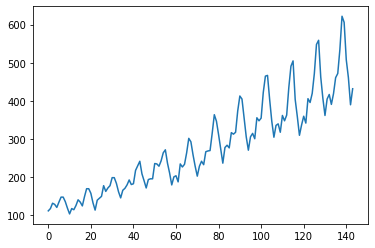

In [252]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
dataset = pandas.read_csv('/content/international-airline-passengers.csv',usecols=[1],engine='python',skipfooter=3)
plt.plot(dataset)
plt.show()

In [253]:
dataset

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


# New Section

In [0]:
import numpy
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [0]:
import sklearn

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
# for reproducability of the results let's fix the seed function
numpy.random.seed(1234)

In [259]:
dataset.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


In [0]:
dataset = dataset.values
dataset = dataset.astype('float32')

In [0]:
# normaliza the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [262]:
dataset

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [0]:
# split the dataset into train and test 
train_size = int(len(dataset)*0.67)

In [264]:
print(train_size)

96


In [0]:
test_size = len(dataset) - train_size

In [266]:
print(test_size)

48


In [0]:
train,test = dataset[0:train_size,:],dataset[train_size:len(dataset),:]

In [268]:
print (len(train), len(test))

96 48


In [0]:
# create dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return numpy.array(dataX),numpy.array(dataY)

In [0]:
#reshape the dataset X =current time, and Yt+1 =future time period
look_back =1
trainX, trainY = create_dataset(train,look_back)
testX, testY = create_dataset(test,look_back)

In [271]:
trainX.shape

(94, 1)

In [0]:
trainX = numpy.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = numpy.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [273]:
trainX.shape

(94, 1, 1)

In [274]:
# let's create  a RNN or LSTM model
model = Sequential()
model.add(LSTM(4,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

# fit the model
model.fit(trainX,trainY,batch_size=1,verbose=2, epochs=10)

Epoch 1/10
 - 3s - loss: 0.0330
Epoch 2/10
 - 0s - loss: 0.0153
Epoch 3/10
 - 0s - loss: 0.0119
Epoch 4/10
 - 0s - loss: 0.0110
Epoch 5/10
 - 0s - loss: 0.0102
Epoch 6/10
 - 0s - loss: 0.0093
Epoch 7/10
 - 0s - loss: 0.0086
Epoch 8/10
 - 0s - loss: 0.0076
Epoch 9/10
 - 0s - loss: 0.0069
Epoch 10/10
 - 0s - loss: 0.0060


In [0]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [276]:
print(trainPredict)

[[0.12165606]
 [0.1272844 ]
 [0.14050812]
 [0.1376642 ]
 [0.13010757]
 [0.1433574 ]
 [0.15576309]
 [0.15576309]
 [0.14430834]
 [0.1282248 ]
 [0.11419046]
 [0.1272844 ]
 [0.12446719]
 [0.13482577]
 [0.14907154]
 [0.1433574 ]
 [0.13388085]
 [0.15672113]
 [0.17695138]
 [0.17695138]
 [0.16536608]
 [0.1414573 ]
 [0.12352946]
 [0.14811778]
 [0.15289207]
 [0.15767968]
 [0.18470842]
 [0.17018554]
 [0.17888825]
 [0.18470842]
 [0.2051784 ]
 [0.2051784 ]
 [0.19054207]
 [0.16922075]
 [0.15384856]
 [0.17308259]
 [0.1779196 ]
 [0.18665153]
 [0.19931558]
 [0.18762362]
 [0.18956889]
 [0.22380464]
 [0.2356053 ]
 [0.2474251 ]
 [0.21497135]
 [0.19736364]
 [0.17888825]
 [0.20029196]
 [0.20224568]
 [0.20224568]
 [0.2415133 ]
 [0.24052832]
 [0.2346211 ]
 [0.2484107 ]
 [0.26911914]
 [0.27700853]
 [0.24249837]
 [0.21693282]
 [0.18665153]
 [0.20713495]
 [0.21007173]
 [0.19443816]
 [0.24052832]
 [0.23265304]
 [0.23954353]
 [0.26911914]
 [0.30655015]
 [0.29769847]
 [0.2641877 ]
 [0.2346211 ]
 [0.20909254]
 [0.23

In [277]:
print(testPredict)

[[0.31931183]
 [0.30556726]
 [0.3592919 ]
 [0.35152966]
 [0.35832286]
 [0.4223612 ]
 [0.46230304]
 [0.4641354 ]
 [0.40535295]
 [0.35055792]
 [0.30949792]
 [0.33984834]
 [0.3437469 ]
 [0.32225204]
 [0.36509925]
 [0.35152966]
 [0.36606592]
 [0.43454295]
 [0.48593718]
 [0.4984908 ]
 [0.40535295]
 [0.36219722]
 [0.31440732]
 [0.3408234 ]
 [0.3631649 ]
 [0.34569442]
 [0.40725058]
 [0.397744  ]
 [0.42047936]
 [0.468706  ]
 [0.53625745]
 [0.54572135]
 [0.4604683 ]
 [0.40819865]
 [0.36509925]
 [0.40630203]
 [0.4176528 ]
 [0.39297372]
 [0.4195376 ]
 [0.45863122]
 [0.468706  ]
 [0.524968  ]
 [0.59832793]
 [0.58522725]
 [0.5011647 ]
 [0.45863122]]


In [0]:
# reverse the predicted values to thee actual time series values using inverse tranform function
trainPredict = scaler.inverse_transform(trainPredict) 
testPredict = scaler.inverse_transform(testPredict)

trainY = scaler.inverse_transform([trainY]) #expects the 2D array, thus added []
testY = scaler.inverse_transform([testY])

In [279]:
print(trainPredict[:, 0], trainY[0])

[167.01784 169.9333  176.7832  175.31006 171.3957  178.25912 184.68529
 184.68529 178.75172 170.42046 163.15067 169.9333  168.47401 173.83975
 181.21906 178.25912 173.35028 185.18155 195.66081 195.66081 189.65964
 177.27487 167.98827 180.725   183.1981  185.67807 199.67896 192.15611
 196.66411 199.67896 210.28242 210.28242 202.70079 191.65634 183.69356
 193.65678 196.16235 200.68549 207.24547 201.18904 202.1967  219.9308
 226.04355 232.16621 215.35515 206.23438 196.66411 207.75124 208.76326
 208.76326 229.10388 228.59367 225.53372 232.67674 243.40372 247.49042
 229.61415 216.3712  200.68549 211.2959  212.81715 204.71896 228.59367
 224.51428 228.08354 243.40372 262.79297 258.2078  240.84923 225.53372
 212.30994 225.53372 232.16621 227.57344 244.93636 245.95802 246.46886
 269.40353 294.12265 285.589   267.87952 248.5119  229.61415 250.55446
 253.6172  250.04387 270.419   268.3876  270.92654 299.11728 318.38828
 314.46448 289.61124 264.8287 ] [117.99999916 131.99999879 129.00000163 120.99

In [280]:
print(testPredict, testY)

[[269.40353]
 [262.28384]
 [290.1132 ]
 [286.09238]
 [289.61124]
 [322.7831 ]
 [343.47296]
 [344.42212]
 [313.9728 ]
 [285.589  ]
 [264.31992]
 [280.04147]
 [282.06088]
 [270.92654]
 [293.12143]
 [286.09238]
 [293.62216]
 [329.09326]
 [355.71548]
 [362.21823]
 [313.9728 ]
 [291.61816]
 [266.863  ]
 [280.5465 ]
 [292.11942]
 [283.0697 ]
 [314.9558 ]
 [310.0314 ]
 [321.80832]
 [346.7897 ]
 [381.78137]
 [386.6837 ]
 [342.52255]
 [315.44693]
 [293.12143]
 [314.46448]
 [320.34418]
 [307.5604 ]
 [321.3205 ]
 [341.57098]
 [346.7897 ]
 [375.93344]
 [413.9339 ]
 [407.1477 ]
 [363.6033 ]
 [341.57098]] [[301.00001152 355.999993   348.00001085 355.00000681 421.9999924
  465.0000161  466.99998848 403.99999397 346.99999379 304.99998716
  335.99999132 339.99999783 317.99999288 362.00000277 348.00001085
  362.99998896 434.99999813 491.00002756 505.00001948 403.99999397
  359.00001333 310.00001073 337.00000838 359.99999952 342.00000109
  406.0000281  395.99998094 420.00002002 471.99998119 548.00004318


In [281]:
# calculate the RMSE root mean square error
trainScore = math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
print ('Train Score: %.2f RMSE' % (trainScore))

Train Score: 38.63 RMSE


In [282]:
testScore = math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
print ('Test Score: %.2f RMSE' % (testScore))

Test Score: 110.50 RMSE


Epoch 1/1
 - 3s - loss: 0.0542
Train Score: 96.63 RMSE
Test Score: 283.57 RMSE


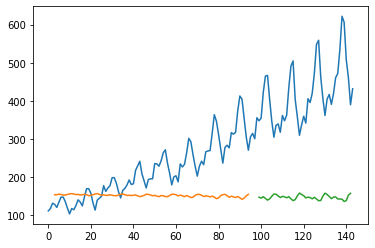

In [283]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('/content/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()